## Importing data, merging datasets, and removing NaN

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [273]:
# import our two CSVs
latest_df = pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
historical_df = pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

# merging both datasets
merged_df = pd.merge(historical_df, latest_df, how="outer")
merged_df

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30797,Omer Yurtseven,yurtsom01,2023,RS,MIA,177,83,2.486415,-7.487443,-5.001027,...,1.332271,-5.782120,-4.449850,0.241523,1.659495,-7.678176,-6.018681,5.109138,-4.382791,0.726346
30798,Cody Zeller,zelleco01,2023,PO,MIA,354,174,-3.408309,-1.285457,-4.693766,...,-3.123433,-2.253790,-5.377222,0.312978,-4.691477,-1.659638,-6.351115,3.038203,0.802259,3.840461
30799,Cody Zeller,zelleco01,2023,RS,MIA,447,217,-1.370539,-5.780102,-7.150641,...,-1.658070,-3.760831,-5.418901,0.311628,-1.382510,-5.605615,-6.988125,-1.018074,-4.713301,-5.731374
30800,Ivica Zubac,zubaciv01,2023,PO,LAC,274,130,-3.769316,8.511745,4.742429,...,-4.849337,5.794117,0.944780,0.534762,-3.282714,11.150790,7.868076,-4.475477,-5.323365,-9.798842


In [274]:
# showcasing null data, raptor_box and raptor_onoff are only for 2013-onward.
merged_df.isnull().sum()

player_name                 0
player_id                   0
season                      0
season_type                 0
team                        0
poss                        0
mp                          0
raptor_offense              0
raptor_defense              0
raptor_total                0
war_total                   2
war_reg_season              1
war_playoffs                1
predator_offense            0
predator_defense            0
predator_total              0
pace_impact                 2
raptor_box_offense      29976
raptor_box_defense      29976
raptor_box_total        29976
raptor_onoff_offense    29976
raptor_onoff_defense    29976
raptor_onoff_total      29976
dtype: int64

In [275]:
# filling NaN and creating a new DataFrame
merged_df.fillna(0, inplace=True)
clean_merged_df = merged_df
clean_merged_df.isnull().sum()

player_name             0
player_id               0
season                  0
season_type             0
team                    0
poss                    0
mp                      0
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             0
raptor_box_offense      0
raptor_box_defense      0
raptor_box_total        0
raptor_onoff_offense    0
raptor_onoff_defense    0
raptor_onoff_total      0
dtype: int64

In [276]:
clean_merged_df

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30797,Omer Yurtseven,yurtsom01,2023,RS,MIA,177,83,2.486415,-7.487443,-5.001027,...,1.332271,-5.782120,-4.449850,0.241523,1.659495,-7.678176,-6.018681,5.109138,-4.382791,0.726346
30798,Cody Zeller,zelleco01,2023,PO,MIA,354,174,-3.408309,-1.285457,-4.693766,...,-3.123433,-2.253790,-5.377222,0.312978,-4.691477,-1.659638,-6.351115,3.038203,0.802259,3.840461
30799,Cody Zeller,zelleco01,2023,RS,MIA,447,217,-1.370539,-5.780102,-7.150641,...,-1.658070,-3.760831,-5.418901,0.311628,-1.382510,-5.605615,-6.988125,-1.018074,-4.713301,-5.731374
30800,Ivica Zubac,zubaciv01,2023,PO,LAC,274,130,-3.769316,8.511745,4.742429,...,-4.849337,5.794117,0.944780,0.534762,-3.282714,11.150790,7.868076,-4.475477,-5.323365,-9.798842


## Question 1: Do the amount of possessions per player greatly impact that player’s team's total RAPTOR ratings by season? Why or why not?

In [277]:
# defining a full list of players from both sets of data based on possessions and total RAPTOR scores

poss_raptor = clean_merged_df.groupby(["player_name"])[["poss", "raptor_total"]].sum(numeric_only = None)
poss_raptor_df = pd.DataFrame(poss_raptor)

# reset index
poss_raptor_df = poss_raptor_df.reset_index()

In [278]:
poss_raptor_df

,player_name,poss,raptor_total
0,A.C. Green,81445,-5.311204
1,A.J. Bramlett,123,-9.820485
2,A.J. English,6393,-8.779331
3,A.J. Guyton,2362,-16.723745
4,A.J. Lawson,239,-29.105705
...,...,...,...
3652,Zion Williamson,7884,7.994044
3653,Zoran Dragic,157,-20.790452
3654,Zoran Planinic,3031,-37.845044
3655,Zydrunas Ilgauskas,47680,-5.899477


In [279]:
# setting dataframe to label top 20 players by possession total

by_poss = poss_raptor_df.groupby(["player_name"])[["raptor_total", "poss"]].sum().sort_values(by="poss", ascending=False)
by_poss = by_poss.reset_index()
by_poss = by_poss.head(20)

In [280]:
# setting dataframe to label top 20 players by RAPTOR total

by_raptor = poss_raptor_df.groupby(["player_name"])[["poss", "raptor_total"]].sum().sort_values(by="raptor_total", ascending=False)
by_raptor = by_raptor.reset_index()
by_raptor = by_raptor.head(20)

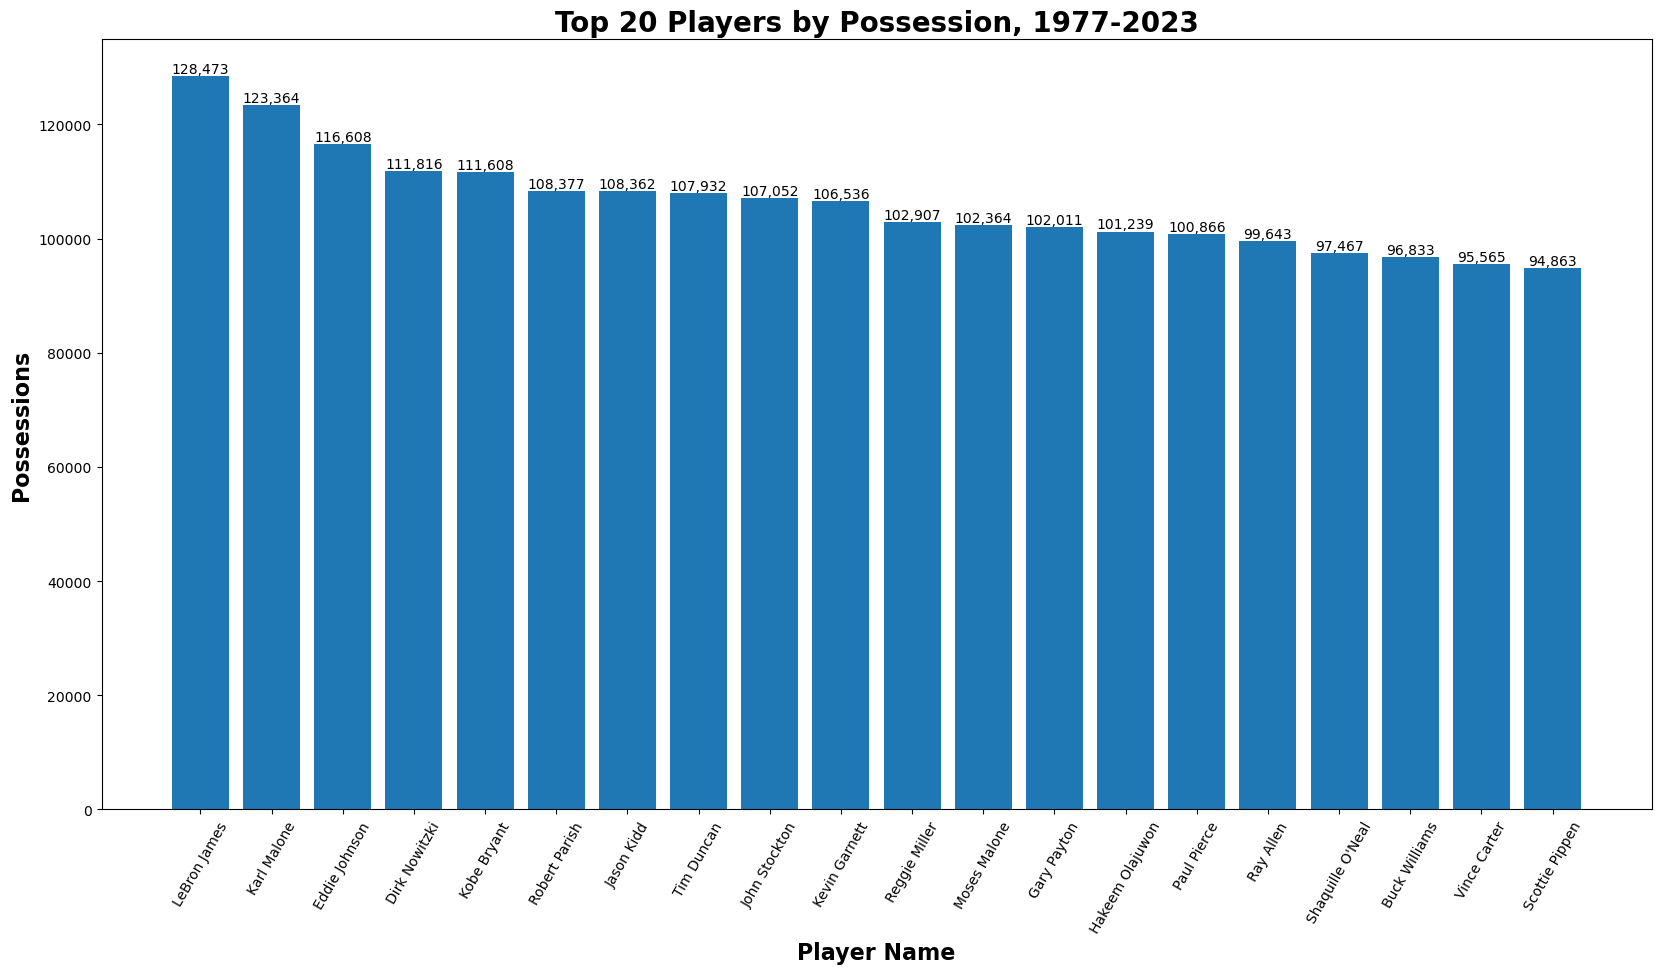

In [281]:
# graphing top players by possession

poss = by_poss["poss"]
players = by_poss["player_name"]

fig, ax = plt.subplots()
bar_container= ax.bar(players, poss)
ax.bar_label(bar_container,fmt='{:,.0f}')
plt.title("Top 20 Players by Possession, 1977-2023", weight="bold", fontsize=20)
plt.xlabel("Player Name", weight="bold", fontsize=16)
plt.ylabel("Possessions", weight="bold", fontsize=16)
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(rotation=60)
plt.show()

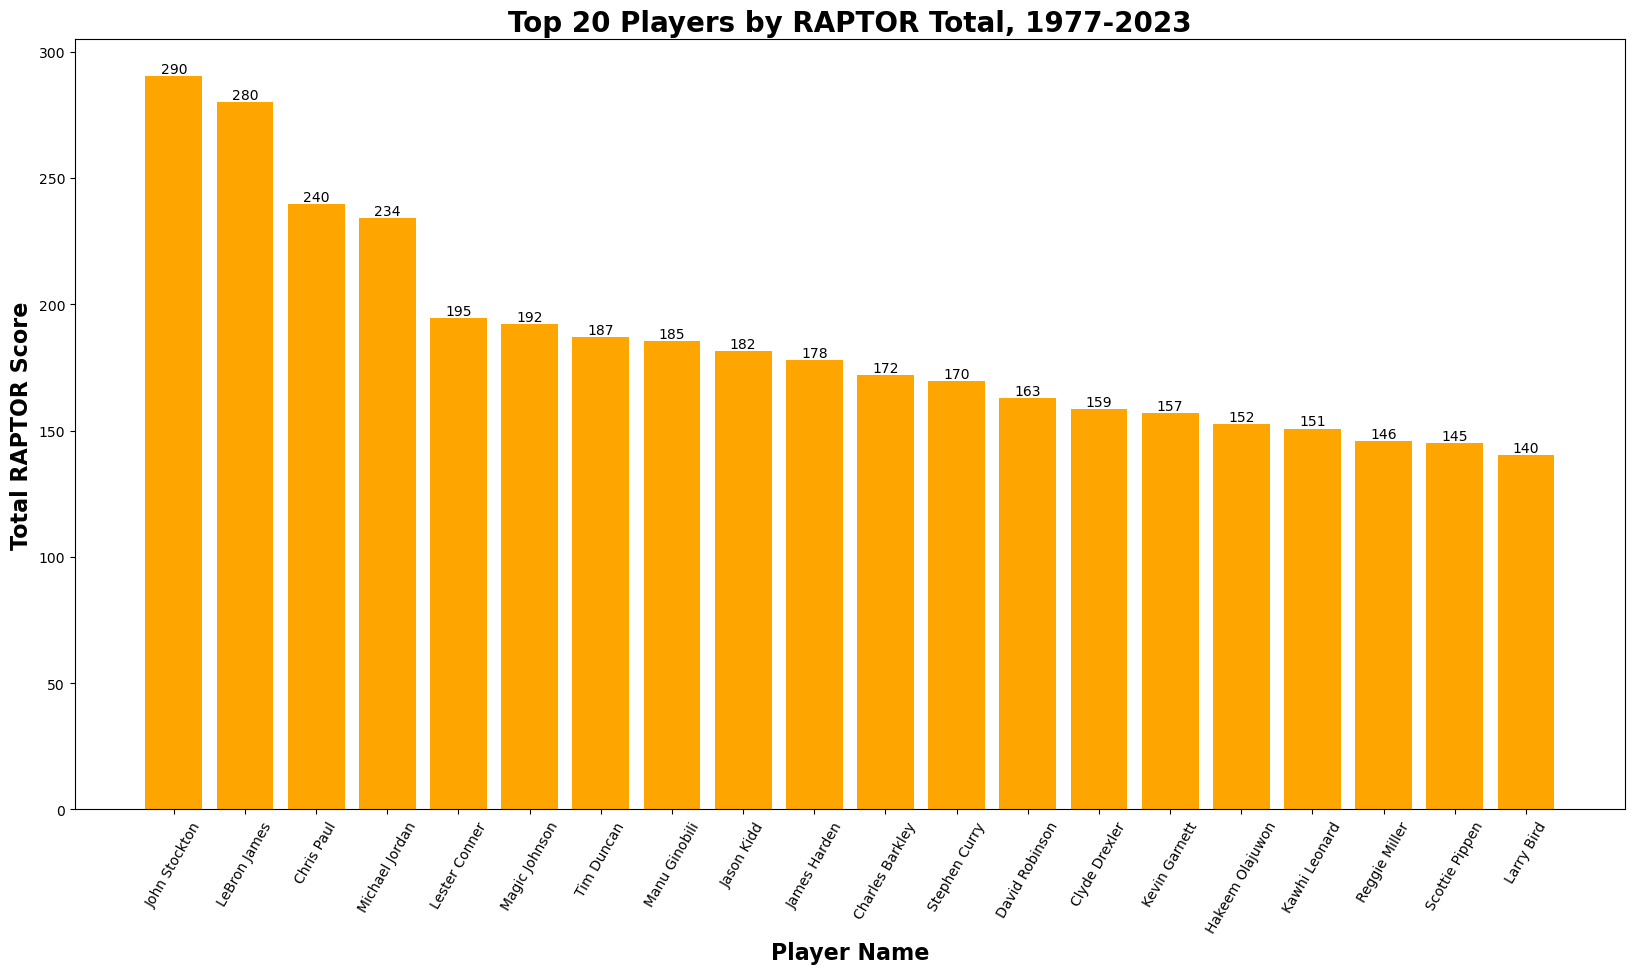

In [282]:
# graphing top players by RAPTOR total

raptor = by_raptor["raptor_total"]
players = by_raptor["player_name"]
color = "orange"

fig, ax = plt.subplots()
bar_container= ax.bar(players, raptor, color=color)
ax.bar_label(bar_container,fmt='{:,.0f}')
plt.title("Top 20 Players by RAPTOR Total, 1977-2023", weight="bold", fontsize=20)
plt.xlabel("Player Name", weight="bold", fontsize=16)
plt.ylabel("Total RAPTOR Score", weight="bold", fontsize=16)
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(rotation=60)
plt.show()

In [283]:
# make a new dataframe to display by teams

total_players = clean_merged_df.groupby("team")["player_name"].count()
raptor_total = clean_merged_df.groupby("team")["raptor_total"].mean()
poss_total = clean_merged_df.groupby("team")["poss"].mean()

team_poss_raptor = pd.DataFrame({"Total Players":total_players,
                                "Total RAPTOR Score":raptor_total,
                                "Total Possessions":poss_total})

In [284]:
team_poss_raptor.head()

,Total Players,Total RAPTOR Score,Total Possessions
team,,,
ATL,1185,-1.570031,1642.004219
BOS,1222,-1.199087,1704.759411
BRK,340,-1.191441,1366.402941
BUF,37,-2.715885,2382.189189
CHA,380,-2.366248,1938.507895


In [285]:
# define a function to create linear regression plots

def linear_regression(x_values, y_values, x=0, y=0):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=20, color="red")
    plt.xlabel(x_values.name, weight='bold', fontsize=15)
    plt.ylabel(y_values.name, weight='bold', fontsize=15)
    plt.grid()
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.19019525425278175


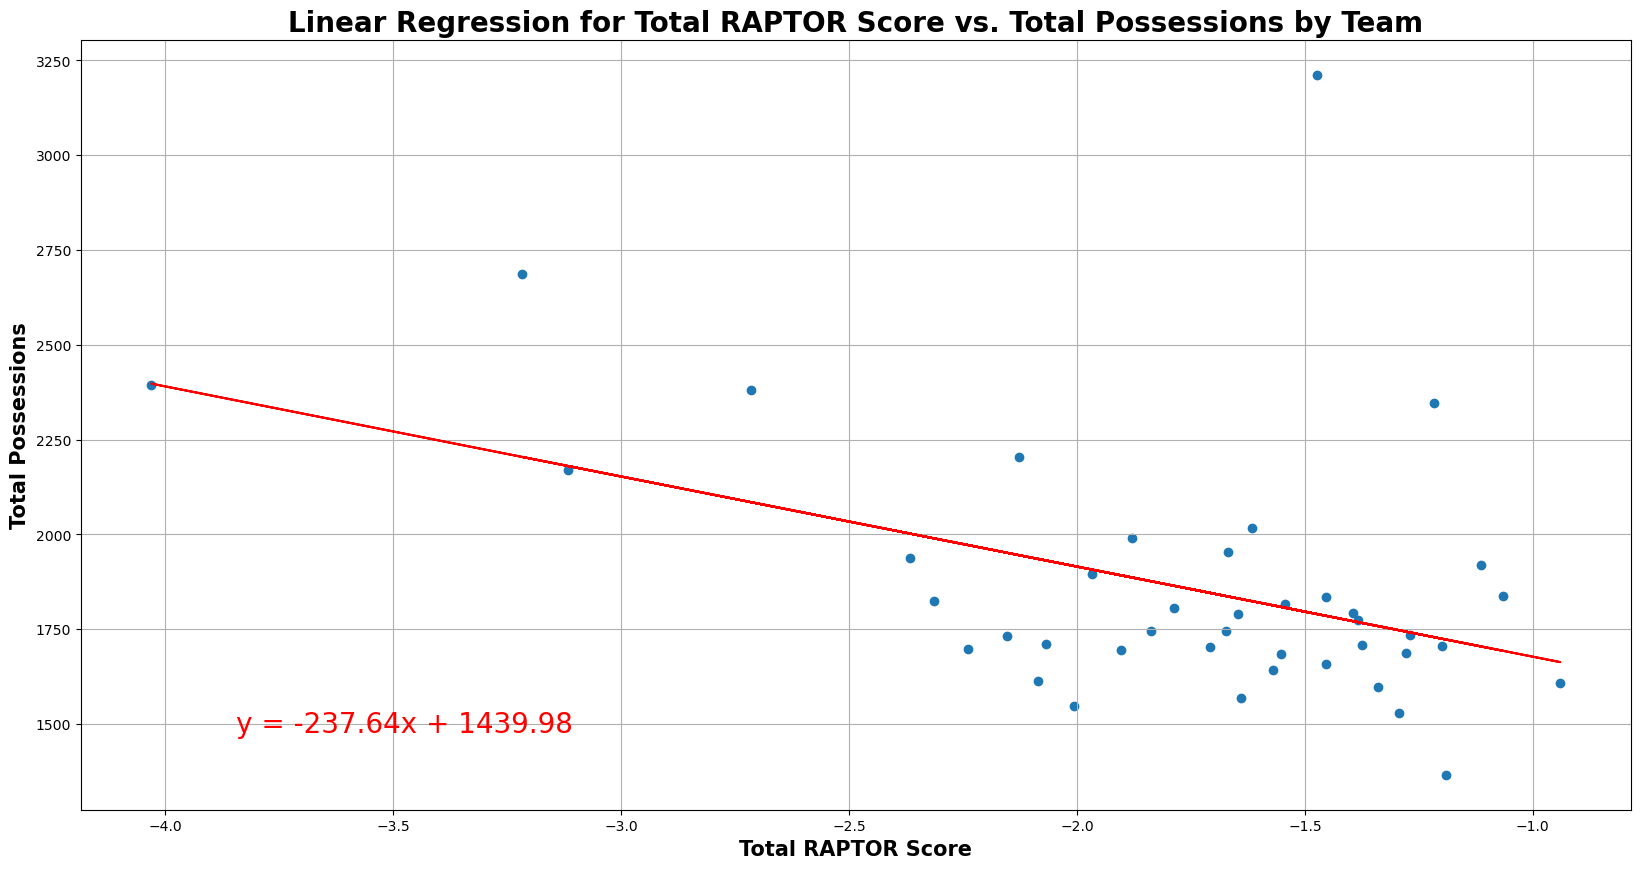

In [290]:
# linear regression for total RAPTOR score vs. total possessions

plt.title("Linear Regression for Total RAPTOR Score vs. Total Possessions by Team", weight='bold', fontsize=20)
x_values = team_poss_raptor["Total RAPTOR Score"]
y_values = team_poss_raptor["Total Possessions"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.08062843984532685


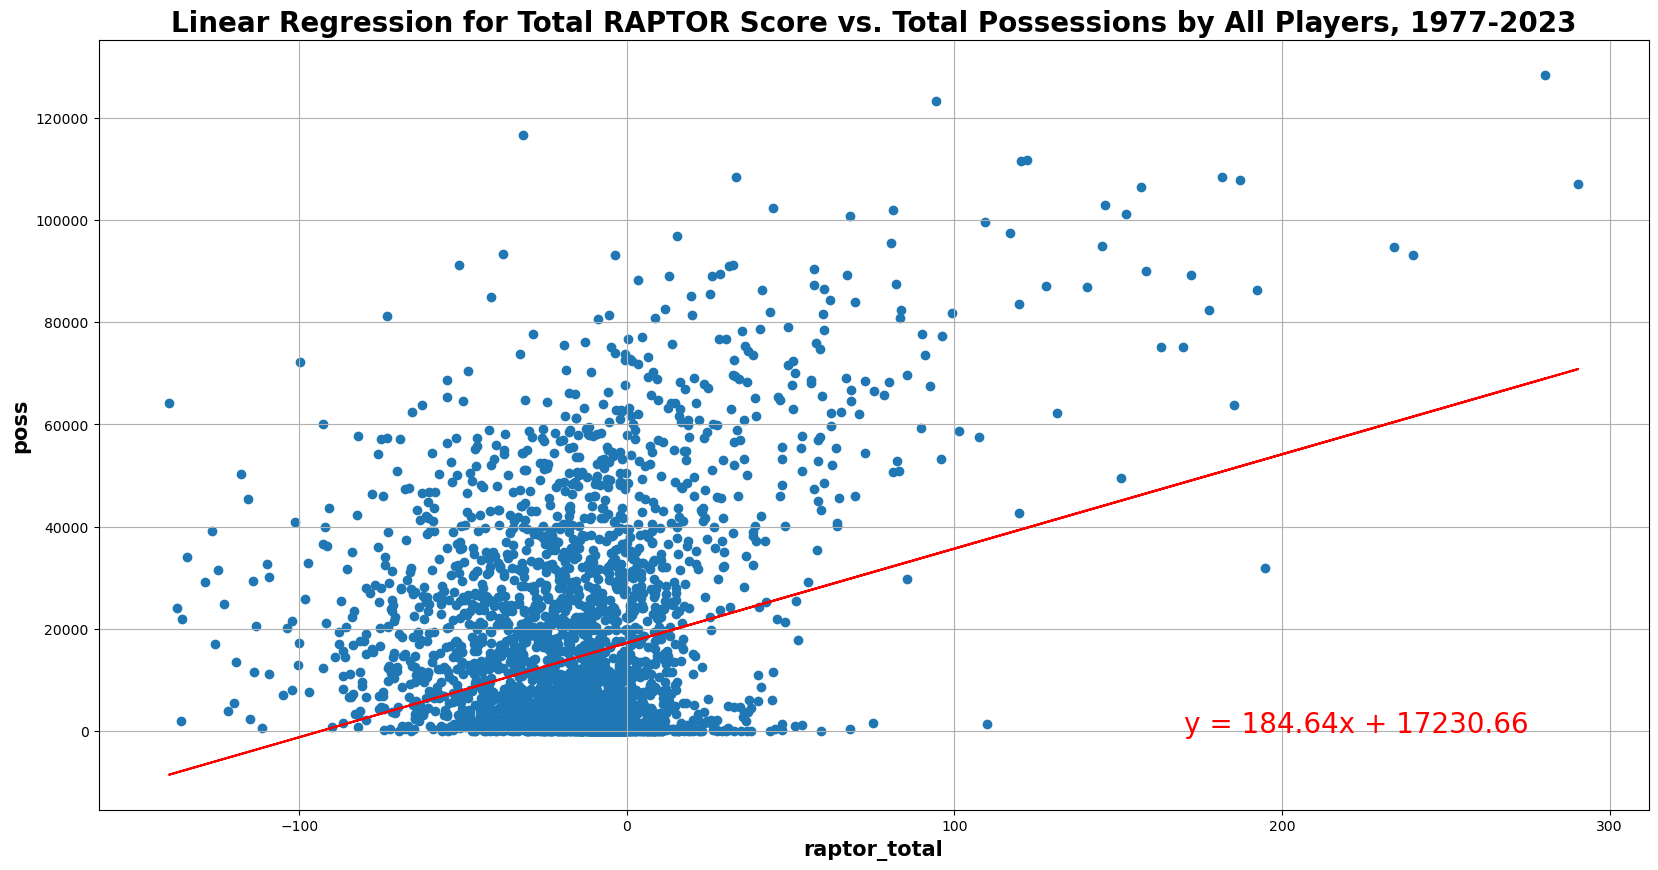

In [287]:
by_poss = poss_raptor_df.groupby(["player_name"])[["raptor_total", "poss"]].sum().sort_values(by="poss", ascending=False)

plt.title("Linear Regression for Total RAPTOR Score vs. Total Possessions by All Players, 1977-2023", weight='bold', fontsize=20)
x_values = by_poss["raptor_total"]
y_values = by_poss["poss"]

linear_regression(x_values, y_values, 0.7, 0.1)